In [100]:
using Pkg
Pkg.activate("../.."); # Actives the environment at the root of the project
# Using our Carbon-I and vSmartMOM packages (developed by our team)

using CairoMakie, DelimitedFiles, Statistics, Interpolations
using Unitful, UnitfulEquivalences
include(joinpath("../../src/Plots", "CI_colorsNew.jl"));
# 1. Load the ggplot theme
#gg = theme_ggplot2()

# 2. Update its font attribute to "Helvetica Condensed Light"
#    (If your system or CairoMakie doesn't recognize the exact name,
#     you might need to specify the full path to the .ttf file.)
#updated_gg = update_theme!(gg, font = "Helvetica")

set_theme!(theme_ggplot2())
update_theme!(font="Helvetica")

  Activating project at `~/code/gitHub/CarbonI`


In [101]:
CarbonI_colors

In [97]:
# Read data from other notebooks
data = readdlm("../../data/plot_data_Revisit.txt", skipstart=1)[1:13,:];

data_raw    = readdlm("../../data/plot_data_figS2_raw.txt", skipstart=1);
data_strict = readdlm("../../data/plot_data_figS2_strict.txt", skipstart=1);
@show data

data = [30.0 0.1280564384315236 0.0019723317584442825 0.49805576199025364 89.05555555555556 4.247557110427887; 90.0 0.1043830967777867 0.00128350367954788 0.44426094517024906 29.685185185185187 1.736957586641364; 150.0 0.0885859708920431 0.0008772187864615693 0.4038011893512946 17.81111111111111 1.228020712802833; 200.0 0.0748854616233386 0.000593843500322497 0.3680738867621122 13.358333333333333 1.0895179594373432; 300.0 0.0543927035595889 0.00026891378564216717 0.3100585346421198 8.905555555555555 1.0; 400.0 0.0401887935225798 0.00011787347709272957 0.26547810441843506 6.679166666666666 1.0150722152624847; 600.0 0.026343620980105 2.6127538275277126e-5 0.21534421930702927 4.4527777777777775 1.0323695364556544; 800.0 0.0177215153186065 8.443026224508511e-7 0.1783959560456137 3.339583333333333 1.1509886975314108; 1000.0 0.010746150204559 0.0 0.14348904623665756 2.671666666666667 1.5184797120138822; 1250.0 0.0067588605839349 0.0 0.1194018652567855 2.1373333333333333 1.9314274487818128; 1

13×6 Matrix{Float64}:
   30.0  0.128056    0.00197233   0.498056   89.0556   4.24756
   90.0  0.104383    0.0012835    0.444261   29.6852   1.73696
  150.0  0.088586    0.000877219  0.403801   17.8111   1.22802
  200.0  0.0748855   0.000593844  0.368074   13.3583   1.08952
  300.0  0.0543927   0.000268914  0.310059    8.90556  1.0
  400.0  0.0401888   0.000117873  0.265478    6.67917  1.01507
  600.0  0.0263436   2.61275e-5   0.215344    4.45278  1.03237
  800.0  0.0177215   8.44303e-7   0.178396    3.33958  1.15099
 1000.0  0.0107462   0.0          0.143489    2.67167  1.51848
 1250.0  0.00675886  0.0          0.119402    2.13733  1.93143
 1500.0  0.00432033  0.0          0.101193    1.78111  2.51799
 1750.0  0.00281323  0.0          0.0878201   1.52667  3.31451
 2000.0  0.00181343  0.0          0.0770059   1.33583  4.49916

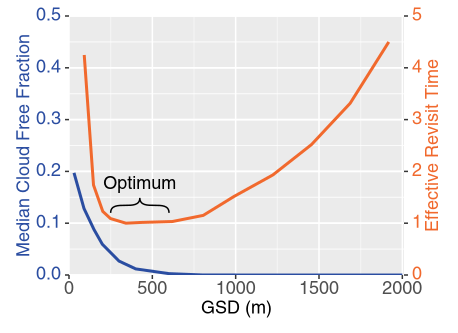

In [ ]:
f = Figure(resolution=(550/1.2,400/1.2), fontsize = 18, backgroundcolor = :transparent, fonts = (; regular = "Helvetica Condensed Light", bold="Helvetica Condensed Bold"))
#ax = Axis(f[1,1], xlabel="GSD (m)", ylabel="",  title="Impact of GSD on Effective Revisit Time")

ax1 = Axis(f[1, 1], yticklabelcolor = CarbonI_colors[4], ylabelcolor= CarbonI_colors[4], xlabel="GSD (m)",ylabel="Median Cloud Free Fraction")
ax2 = Axis(f[1, 1], yticklabelcolor = CarbonI_colors[5], ylabelcolor= CarbonI_colors[5], yaxisposition = :right, ylabel="Effective Revisit Time")
#poly!(ax1,Point2f[(250, 0), (600, 0), (600, 0.5), (250, 0.5)], color = (:red,0.4), strokecolor = :black, strokewidth = 1)
#text!(ax1, "Carbon-I Optimum", position=(370, 0.15),rotation=π/2, fontsize=18)
hidespines!(ax2)
hidexdecorations!(ax2)

lines!(ax1,  data[:,1], data[:,3]*100, color=CarbonI_colors[4], linewidth=3, )
lines!(ax2, data[:,1], data[:,end], color=CarbonI_colors[5], linewidth=3, )
bracket!(ax1,250,0.12 , 600, 0.12, offset = 0, text = "Optimum")

xlims!(ax1,0.,2010)
ylims!(ax1,0.,0.5)
ylims!(ax2,0.,5)

#axislegend(ax,position = :rt)
save("../../plots/final/RevisitTimes.pdf",f)
save("../../plots/final/Box-D1-RevisitTimes.eps",f)
f

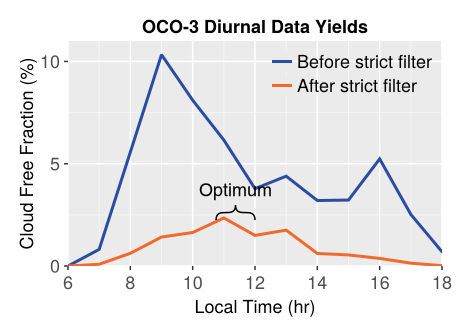

In [ ]:
f = Figure(resolution=(550/1.2,400/1.2), fontsize = 18, backgroundcolor = :transparent,)
#ax = Axis(f[1,1], xlabel="GSD (m)", ylabel="",  title="Impact of GSD on Effective Revisit Time")

ax1 = Axis(f[1, 1],  xlabel="Local Time (hr)",ylabel="Cloud Free Fraction (%)", title="OCO-3 Diurnal Data Yields")


lines!(ax1,  data_raw[:,1], data_raw[:,2]*100, color=CarbonI_colors[4], linewidth=3,label="Before strict filter" )
lines!(ax1, data_strict[:,1], data_strict[:,2]*100, color=CarbonI_colors[5], linewidth=3,label="After strict filter" )
bracket!(ax1,10.75,2 , 12, 2, offset = 5, text = "Optimum")

xlims!(ax1,6.,18)
ylims!(ax1,0.,11)
#ylims!(ax2,0.,5)

axislegend(ax1,position = :rt)
save("../../plots/final/DiurnalCloudOCO3.pdf",f)
save("../../plots/final/Box-D1-DiurnalCloudOCO3.eps",f)
f